<a href="https://colab.research.google.com/github/Crispae/AIF360/blob/master/AI4OH_MTM_Lab_1_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of NLP: DataFrame rudiments, parsing using spaCy, MetaMap

## Libraries

We will consider a corpus of 333 abstracts of scientific papers on covid-19 published in the journal [Science](https://www.science.org/), scraped using the search tool PubMed.

To run this notebook, make sure that the file "covid_ds_full.xml" is uploaded to the colab. (Once you are signed into colab, click File -> Upload notebook. To upload the data, click on the file icon on the far left of the window to open the files panel, then drag-and-drop it in or click on the upload icon with the arrow).

The first step in writing python code is determining which libraries we want to use. To stay organized, we generally import all libraries at the top (of a notebook or a standalone python file).

In [48]:
#import four important libraries
import pandas as pd
#pandas is the most popular data science library. It is used
#for organizing data into columns.
#See more here: https://pandas.pydata.org/

import re
#re is the python library for regular expressions. It is
#difficult to master, but very useful.
#See more here: https://docs.python.org/3/library/re.html

import matplotlib.pyplot as plt
#matplotlib is the most popular and simple library for
#scientific plots in python. The pyplot submodule is
#a data scientist's bread and butter for data visualization.
#See more here: https://matplotlib.org/2.0.2/api/pyplot_api.html

import xml.etree.ElementTree as ET
#ElementTree is a library for parsing XML in python.
#This is a useful skill for data scientists, as lots of data
#is published in XML form. There are other libraries for this,
#such as untangle or xmltodict; however, ElementTree is lower level.
#See more here: https://docs.python.org/3/library/xml.etree.elementtree.html

from numpy import log
#we will need a logarithm function; numpy is a standard mathematical
#library

## XML primer

XML is a common data format that is not highly structured. You can read more about it [here.](https://www.w3schools.com/xml/xml_whatis.asp)
Basically, it is a series of HTML-like tags that denote different types of objects and their hierarchies. For example, here is some XML that describes a simple house:

````
 <house color = "red">
    <floor>
        <window/>
        <door type="front"/>
        <window/>
        <room type="bed">
            Felix's Bedroom
        </room>
        <room type="bath"/>
    </floor>
    <floor>
        <attic>
            <box/>
            <box>Old stuff</box>
            <box/>
            <box>Winter clothes</box>
        </attic>
    </floor>
</house>
````

A tag is closed using a backslash. Some tags have attributes (such as color or type); some tags have text (such as "Felix's Bedroom"," or "Old Stuff"); some tags have nested tags inside them, while others do not.

XML is useful because its structure is quite flexible. As long as each tag is properly closed, users can add however many tags or whatever type in whatever order they want. It is often used to store complex data of varying structure. This inherent flexibility, however, means that it is not easy to use out-of-the-box. We generally convert an XML document into a more rigidly structure data type, such as a DataFrame, before performing operations on the latter.

In [49]:
def generate_covid_df():
    '''
    This function takes a large xml file, downloaded directly from
    pubmed, and extracts several important features from each
    abstract in the XML file: the abstract text, the article ID (unique),
    the publication year, and the title of the abstract. There are plenty
    of other fields that we ignore. Because of the unstructured nature of
    XML, the code we write to extract information needs lots of checks to
    make sure the data is structured like we expect (see line 20 for example).
    '''

    articles = []

    tree = ET.parse("covid_ds_full.xml")
    root = tree.getroot()
    #iterate over all <PubmedArticle> tags
    for pm_article in root.iter("PubmedArticle"):

        #find all <Article> tags, make sure there is only one!, retain the first.
        articles_in_pm_article = list(pm_article.iter("Article"))
        if len(articles_in_pm_article) > 1: continue
        article = articles_in_pm_article[0]

        #find all <PMID> tags, and take the first one. (Potential
        #multiple attribution of ID to same article, this is ok for us.)
        doc_id = int(list(pm_article.iter("PMID"))[0].text)

        #find the <ArticleTitle> for current article
        title = article.find("ArticleTitle").text

        #find the first publication year listed (potentially multiple publication
        #years listed, that's ok for us!)
        year = int(list(article.iter("PubDate"))[0].find("Year").text)
        abstracts = list(article.iter("AbstractText"))

        #if there is more than one abstract, there might be something
        #wonky about this article; let's not risk contaminating our
        #data and skip it!
        if len(abstracts) != 1: continue
        abstract = abstracts[0].text

        #create new dictionary where each field is extracted from the XML.
        #This is necessary to create a DataFrame later - each field
        #will become a column in the DateFrame.
        article_dict = {"doc_id":doc_id,"Title":title,"Abstract":abstract, "Year":year}
        articles.append(article_dict)
    covid_df = pd.DataFrame(articles)
    return covid_df

In [50]:
covid_df = generate_covid_df()
print(len(covid_df))
covid_df.head()

333


,doc_id,Title,Abstract,Year
0,37972180,"Humans are biocultural, science should be too.",COVID-19 is restructuring societies. Lonelines...,2023
1,37972171,The responsibility turn,Lessons from the COVID-19 pandemic inspire a g...,2023
2,37943961,Correction is courageous.,In a year when disagreements over scientific m...,2023
3,37943932,Open science discovery of potent noncovalent S...,"We report the results of the COVID Moonshot, a...",2023
4,37943911,Preparing for the next pandemic.,New lead drugs to treat COVID-19 are beginning...,2023


## Dataframe basics

We have compiled the data into a Pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), which is a standard tool in data science. To answer the following subsection, if you need further help beyond the code hints, you can either use the linked API, or StackOverflow. Being a proficient user of both of those tools are invaluable for data scientists!

We can list the columns of a dataset ````df```` by calling ````df.columns````.

**Question**: What are the columns of the dataset ````covid_df````?

In [51]:
covid_df.columns
#todo: explain each column

Index(['doc_id', 'Title', 'Abstract', 'Year'], dtype='object')

There are 4 columns in the dataframe.  
- **doc_id**: This refers to the unique id of the document, in this case it's called PUBMED id.  
- **Title**: It's is a descriptive name of the document.  
- **Abstract**: Abstract provide comprehensive summarization of information stored in the whole document, In this case it's about the research articles for covid.  
- **Year**: Year of publication of documents

**Question**: How many abstracts are in the dataset?

In [52]:
#todo
covid_df.Abstract.count()
## There are 333 abstracts

333

We can calculate the number of instances of a value for a single column by using ````df.groupby(column).count()````

**Question**: What is the distribution of the years in the dataset?

In [53]:
#todo
covid_df.groupby("Year").count()

,doc_id,Title,Abstract
Year,,,
2020,82,82,82
2021,104,104,104
2022,104,104,104
2023,43,43,43


We can count the number of words in a string using the ````len```` function and ````split```` method of strings. For example:


```
string = "bla bla bla"
len(string.split(" "))
>>> 3
```

**Question**: Fill in the following function:






In [54]:
def num_words(sentence):
    '''
    Calculate the number of words in the sentence.
    '''
    return len(sentence.split())


Furthermore, we can calculate values for each row, based on a specific column, using the ````apply```` method:

```
lengths = df.Abstract.apply(lambda text: num_words)
```

This will give us a [pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of the lengths of each abstract.


**Question**: What is the distribution of the length of the abstracts in words? Visualize this using a python plot (see [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)). Use pure python for this: to find the number of words in a string, use:

In [55]:
#todo
word_length_in_abstract = covid_df.Abstract.apply(num_words)

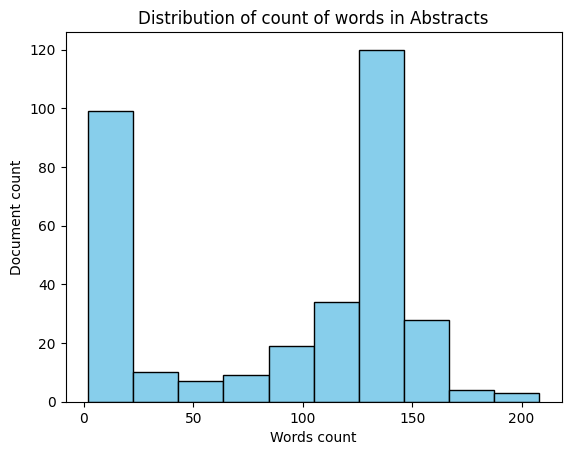

In [94]:
import matplotlib.pyplot as plt

plt.hist(word_length_in_abstract,color='skyblue', edgecolor='black')
plt.title("Distribution of count of words in Abstracts")
plt.xlabel("Words count")
plt.ylabel("Document count")
plt.show()

We can filter a dataframe using criteria based on values in certain columns. The basic syntax for this is:

````
new_df = df[df["column"].apply(lambda row_value: my_func(row_value) == some_value)]
````

This gives a new DataFrame composed of all elements of ````df```` such the values of the function ````myfunc````, calculated for the value of column "column" for each row is equal to some_value. For example, if we wanted all rows whose titles begin with "A", we could run:

````
covid_df_letter_A = covid_df[covid_df["Title"].apply(lambda title: title[0] == "A")]
````

**Question**: Retain only documents with at least 50 words



In [57]:
#todo
document_with_minimum_50_words = covid_df[covid_df["Abstract"].apply(num_words) >= 50]

In [58]:
document_with_minimum_50_words.head()

,doc_id,Title,Abstract,Year
2,37943961,Correction is courageous.,In a year when disagreements over scientific m...,2023
3,37943932,Open science discovery of potent noncovalent S...,"We report the results of the COVID Moonshot, a...",2023
8,37797027,Mapping SARS-CoV-2 antigenic relationships and...,During the severe acute respiratory syndrome c...,2023
13,37616383,Will climate change amplify epidemics and give...,While the world recovers from the COVID-19 pan...,2023
15,37471538,Genomic assessment of invasion dynamics of SAR...,Severe acute respiratory syndrome coronavirus ...,2023


## Introduction to spaCy

spaCy is a package that performs some basic NLP tasks for us, based on training on a large corpus. We can import spaCy libraries for different languages and of different complexities (often in small, medium, and large sizes, where larger means slower to use but with slightly more precise behaviour). For our use case, we will "en_core_web_sm", which is the small English langauge  model.

For basic questions about spaCy, refer to the documentation [here](https://spacy.io/usage/spacy-101).

In [59]:
import spacy
nlp = spacy.load("en_core_web_sm") #this could take a minute to download the first time

The ````nlp```` object can be used to analyze documents. For example:

````doc_analyzed = nlp("Hello world")
doc_analyzed
>>> Hello world
type(doc_analyzed)
>>> spacy.tokens.doc.Doc
````

In [63]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   doc_id    333 non-null    int64 
 1   Title     333 non-null    object
 2   Abstract  333 non-null    object
 3   Year      333 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.5+ KB


We can access the first row of a DataFrame using ````df.iloc[0]```` (in fact we can access any row using the ````iloc```` subscript).

**Question**: Use spaCy to list each token in the Title of the document with doc_id 33906968.

*Hint: spacy.tokens.doc.Doc is an iterable*

In [68]:
#todo
title_with_specific_id = covid_df[covid_df["doc_id"]== 33906968]["Title"].iloc[0]

title_spacy_doc = nlp(title_with_specific_id)

for token in title_spacy_doc:
  print(token)


Socioeconomic
status
determines
COVID-19
incidence
and
related
mortality
in
Santiago
,
Chile
.


**Question**: List the POS of every token from the previous exercise. Do you agree with spaCy?

*Hint: use token.pos_*

In [69]:
#todo

for token in title_spacy_doc:
  print(token.pos_)

ADJ
NOUN
VERB
NOUN
NOUN
CCONJ
ADJ
NOUN
ADP
PROPN
PUNCT
PROPN
PUNCT


In the tokens 'status' and 'incidence' are considered as noun, as it is not person, place or thing but defines the category and measurement as per the context of sentence.

The lemma of a term is the simplest and most distilled version of the term, without prefixes, suffixes, etc. Converting terms to lemmas can be useful in order to reduce the vocabulary size of a corpus and group terms into equivalence classes. For example, "run", "runs", "running", and "ran" all share roughly the same semantic meaning, and in some contexts (though not all!) should be treated the same way.

**Question**: extract the lemmas from the previous exercise. Which terms stay the same, and which differ? In what ways do they differ?

*Hint: use token.lemma_*

In [73]:
#todo
for token in title_spacy_doc:
  print(f"{token} : {token.lemma_}")

Socioeconomic : socioeconomic
status : status
determines : determine
COVID-19 : covid-19
incidence : incidence
and : and
related : related
mortality : mortality
in : in
Santiago : Santiago
, : ,
Chile : Chile
. : .


  Terms differ in the captilization proper noun such as "Santiago" and 'Chile' did not differ, while others get converted to lowercase. Word 'determines' get reduced to it's base form 'determine'

**Question**: How many unique terms are there among all the abstracts? How many unique *lemmas* are there among all the abstracts?

In [81]:
#todo
abstract_of_all_docs = covid_df.Abstract.tolist()

## Pass all abstract to spacy to calculate lemmas
total_lemmas = []
for abstract in abstract_of_all_docs:
  lemmas = [token.lemma_ for token in nlp(abstract)]
  total_lemmas.extend(lemmas)

In [84]:
## unique words
len(set(total_lemmas))

4019

There are total `4019` lemmas in the whole abstracts.

**Question**: Plot the distribution of POS over the all the abstracts.

In [85]:
#todo
abstract_of_all_docs = covid_df.Abstract.tolist()

## Pass all abstract to spacy to calculate lemmas
total_pos = []
for abstract in abstract_of_all_docs:
  pos = [token.pos_ for token in nlp(abstract)]
  total_pos.extend(pos)

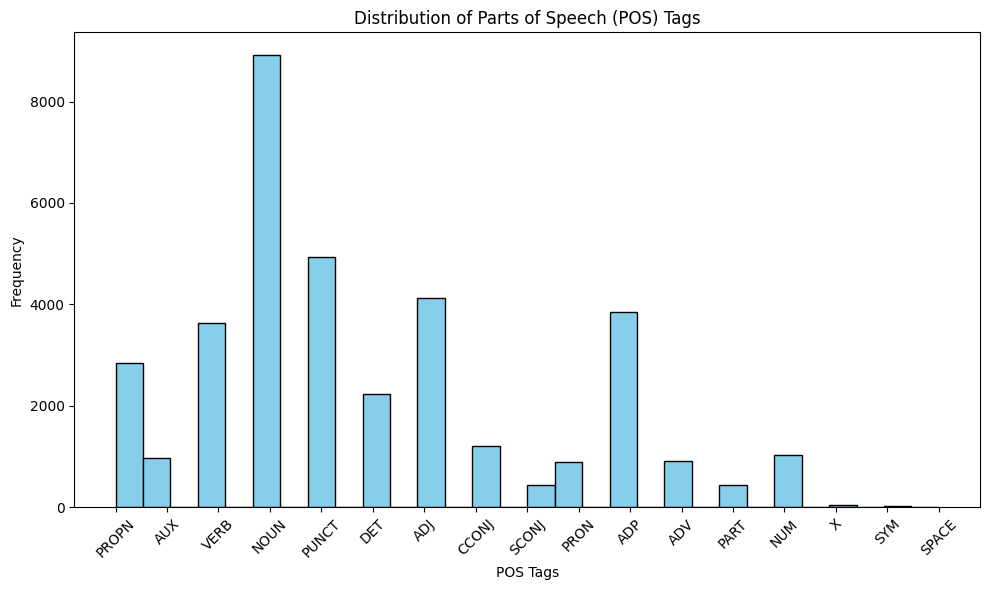

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(total_pos, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Parts of Speech (POS) Tags')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Question**: Plot the distribution of the 100 most common words over the all the abstracts, provided that they are not space or punctuation. Use a log scale for the y axes and describe the graph: the y axis should be frequency, and the x axis should be words sorted by frequency.

*Hint: see [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)*

In [101]:
#todo
from collections import Counter

#todo
abstract_of_all_docs = covid_df.Abstract.tolist()

## Pass all abstract to spacy to calculate lemmas
total_annotation = []
for abstract in abstract_of_all_docs:

  lemma = [token.lemma_ for token in nlp(abstract)]
  pos = [token.pos_ for token in nlp(abstract)]

  assert len(lemma) == len(pos), "Length mismatch"

  mapped = [{"lemma":terms[0],"pos":terms[1]} for terms in zip(lemma,pos)]

  total_annotation.extend(mapped)


In [107]:
## Filtering the punct and space
annotation_df = pd.DataFrame(total_annotation)
df_without_punc_and_space = annotation_df[~annotation_df["pos"].isin(["PUNCT","SPACE"])]

In [139]:
## sorting top 100 words
from collections import Counter
lemma_counter = Counter(df_without_punc_and_space.lemma,)
most_common_100_words = lemma_counter.most_common(n=100)

In [144]:
### Length of total number of tokens
total_tokens = len(df_without_punc_and_space.lemma)

In [149]:
words,frequencies = zip(*most_common_100_words)

log_of_frequencies = [(freq/total_tokens) for freq in frequencies]


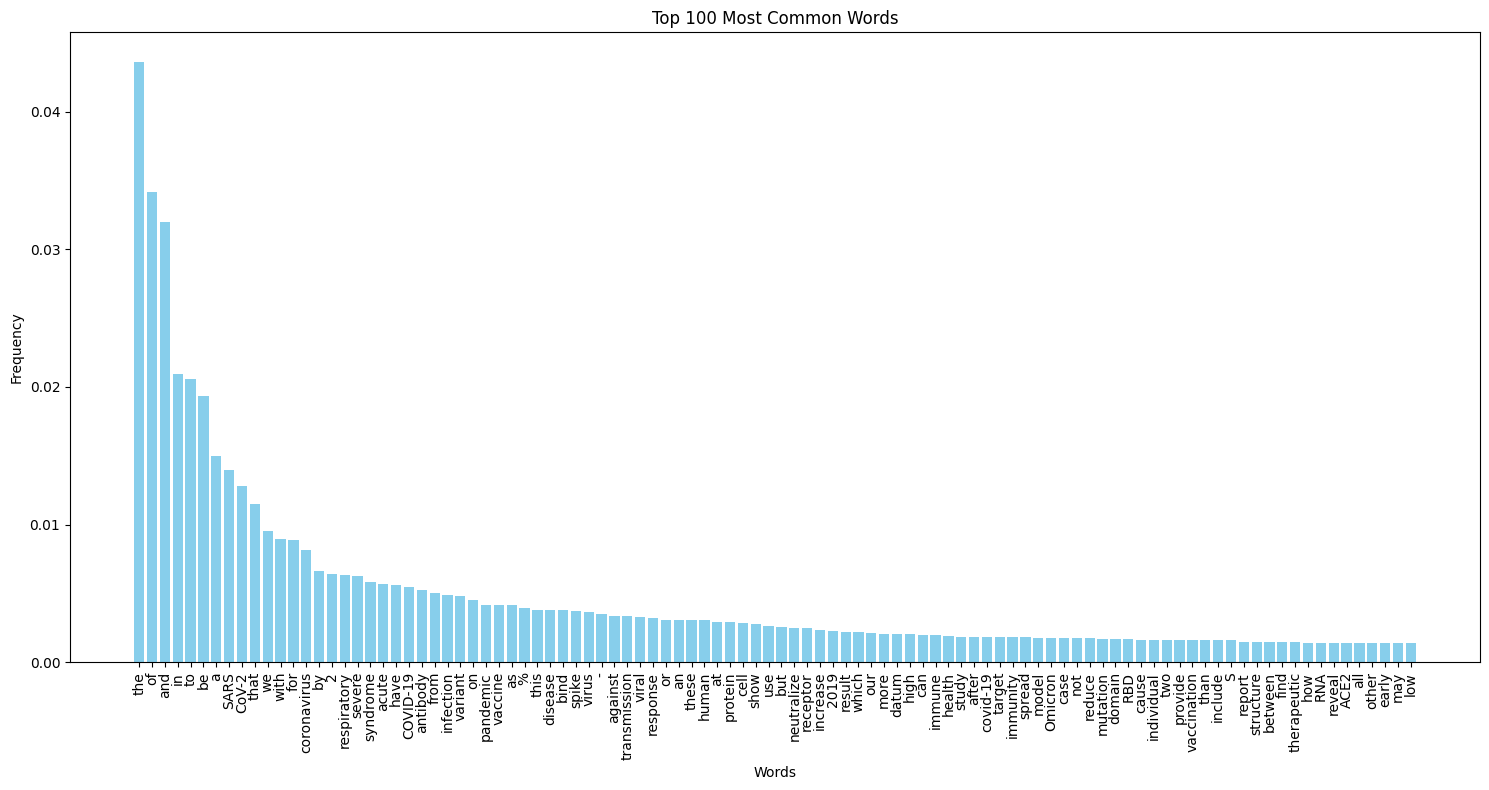

In [150]:
# Plotting the distribution of most common words
plt.figure(figsize=(15, 8))
plt.bar(words, log_of_frequencies, color='skyblue')
plt.title('Top 100 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


As per Zips's law, if the list of measured values is sorted in decreasing order, the value of n'th entry is inversely propotional to n. So the plot follow the same trend, as we can see word "the" appear mmost and, it ranks is high

## Stop words

Stop words are words that, under some frameworks, contribute marginal semantic value, but are important for syntax. For example, "the", "and", "such", etc.

**Question**: In what kind of analysis can we strike stop words without worrying about losing information? In what kind of analysis might we want to keep them around?


**Question**: Write a function:

````def clean(sentence)````

that strikes all stop words, replaces each remaining token with its lemma. Create a cleaned version of each abstract, and save this cleaned version as a new column of the dataframe called "Abstract_clean".

When we performing word frequency analysis or the topic analysis, in that case stop words, will not have any effect as they are the most common words in every corpora. Whereas when we performe semantic and contextual analysis, we need the the complete context to understand the meaning of the sentence.

In [152]:
def clean(sentence):
  doc = nlp(sentence)

  # Remove stop words
  filtered_Sentence = " ".join([token.text for token in doc if not token.is_stop])
  return filtered_Sentence


covid_df["Abstract_clean"] = covid_df.Abstract.apply(clean)

## Dependencies
spaCy calculates dependencies between different tokens:

In [154]:
exp_doc = nlp("Hello! I hope you are well.")
for word in exp_doc:
   print(word.text, word.tag_, word.head)

Hello UH Hello
! . Hello
I PRP hope
hope VBP hope
you PRP are
are VBP hope
well JJ are
. . hope


We can visualize this using dispacy, a visualization library:

In [155]:
from spacy import displacy
displacy.render(exp_doc, style='dep', jupyter=True, options={'distance': 130})

**Question**: Visualize a random title from the dataframe - describe the visualization.

In [160]:
displacy.render(nlp(covid_df.iloc[4].Title), style='dep', jupyter=True, options={'distance': 130})

## NER

spaCy can determine named entities. This is useful for information retrieval.

In [164]:
for ent in nlp("Joe Biden is the president of the USA").ents:
    print(ent.text, ent.label_, spacy.explain(ent.label_))

Joe Biden PERSON People, including fictional
USA GPE Countries, cities, states


**Question**: calculate the ten most common named entities and the five most common labels among the abstracts.

In [165]:
#todo
entites =  []
labels = []
for abstract in abstract_of_all_docs:
  nlp_doc = nlp(abstract).ents
  for ent in nlp_doc:
    entites.append(ent.text)
    labels.append(ent.label_)


In [169]:
top_10_entites = Counter(entites).most_common(10)
top_5_labels = Counter(labels).most_common(5)

In [171]:
top_10_entites

[('COVID-19', 221),
 ('2', 197),
 ('2019', 63),
 ('Omicron', 55),
 ('two', 41),
 ('RNA', 37),
 ('RBD', 33),
 ('China', 32),
 ('Wuhan', 28),
 ('IFN', 28)]

In [170]:
top_5_labels

[('ORG', 578),
 ('CARDINAL', 563),
 ('DATE', 264),
 ('GPE', 219),
 ('PERCENT', 122)]

## TF-IDF

One of the most important statistics we can calculate for a document is the TF-IDF score. This stands for "term frequency-inverse document frequency" score, and it is a measure of the importance of each word to a given document, in the context of the corpus of documents. For each word in each document, we calculate the following ratio:

$\frac{TF_{word; doc}}{IDF_{word; doc}}$

$TF_{word; doc} = \frac{\text{Total counts of word in doc}}{\text{Number of terms in doc}}$

$IDF_{word; doc} = \log{\left(\frac{|\text{corpus}|}{\text{Number of docs containing word}}\right)}$

To have a high TF-IDF score in a document, a word must occur frequently in a document, while appearing rarely in others.

**Question**: Give the limits of TF and IDF for a word/document pair, and give an example of a word-document pair where this might occur (for example, word="Hello", doc=Wikipedia page for greetings, corpus=all of Wikipedia).


**Question**: Code the functions TF and IDF:

*hint: to test your implementation, consider various words that you think should have high or low tf-idf scores. For example, "pandemic", "test", "disease"*

*hint: to get all cleaned Abstracts as a series (iterable), use covid_df.Abstract_clean*

In [204]:
def tf(word, document):
  word_counter = Counter(document.split()) ## this will count the frequency of all words

  return word_counter.get(word,0)/len(document.split()) ## calculation of term frequency


def idf(word, all_documents):
  abstracts = all_documents.tolist()

  word_count_in_corpus = 0
  for abstract in abstracts:
    token_list = list(nlp(abstract))
    token_counter = Counter(token_list)

    if token_counter.get(word):
      word_count_in_corpus = word_count_in_corpus + 1

  return np.log(len(abstracts)/(word_count_in_corpus+1))


def tf_idf(word, document, all_documents):
    return tf(word, document)/idf(word, all_documents)

In [205]:
#test your code:
my_abs = covid_df[covid_df.doc_id==33906968].iloc[0].Abstract_clean
tf_idf("pandemic",my_abs, covid_df.Abstract_clean)

0.0033759232269318725

**Question**: What is the word with the highest and lowest TF-IDF score for document 32179701 (cleaned abstracts).

In [206]:
my_abs_2 = covid_df[covid_df.doc_id==32179701].iloc[0].Abstract_clean

In [207]:
tokens = [token for token in nlp(my_abs_2)]

In [211]:
scores = []
for tok in list(set(tokens)):
  tf_idf_score = tf_idf(tok,my_abs_2, covid_df.Abstract_clean)
  scores.append({tok:tf_idf_score})

**Question**: If we took each document and duplicated it in place, i.e.:

a document "hello world" would become "hello world hello world", how would the tf-idf score of any document-word pair change?

What about if instead of duplicating in place, we doubled the size of the corpus, i.e.

if document "hello world" is in the corpus once, we add a second copy so now it is in the corpus twice. How would the tf-idf score of any document-word pair change now?

**Question**: What could be a potential use-case for the TF-IDF score in practice?

# Medical Knowledge Graphs & Annotation with UMLS & MetaMap

## Introduction

The UMLS Methathesaurus can be accessed by clicking [here](https://uts.nlm.nih.gov/uts/umls/home). First off, run through the following introductory steps to familiarise yourself with how it works.




- Try searching for "Addison disease" (sign in with your account if required)
- **Question**: Using the search filters, constrain your search to concepts from the CHV (Consumer Health Vocabulary), figure below.
How many results do you obtain with & without this filter?

29 results without filter and 6 results with filter

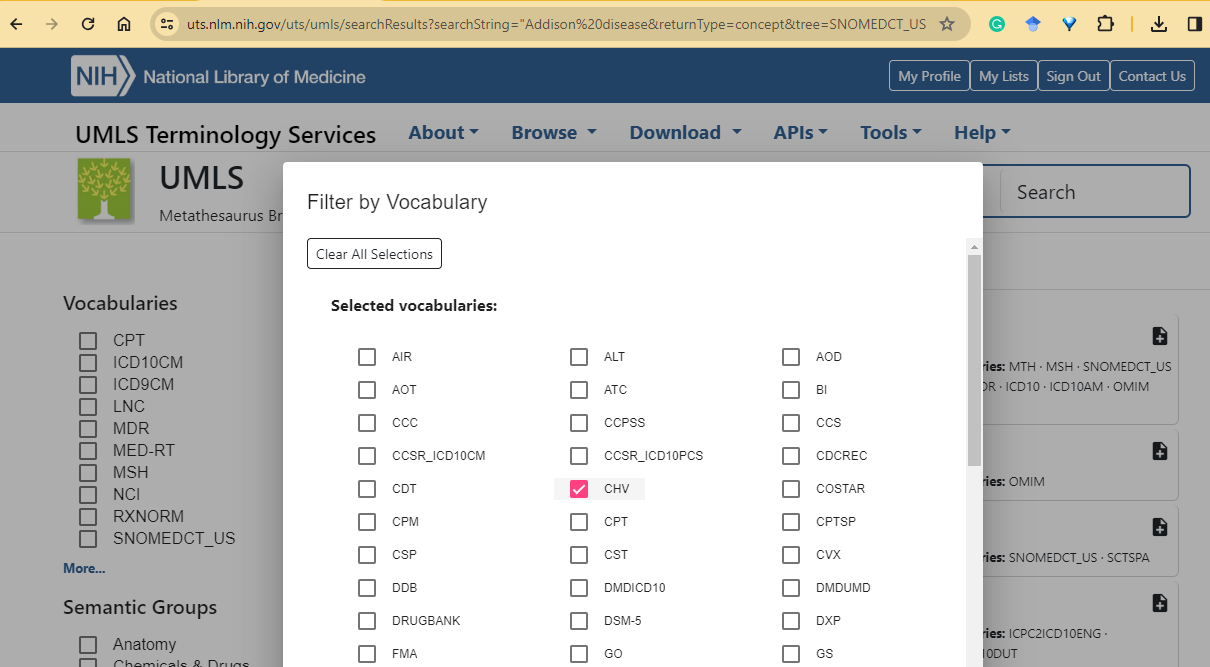


- **Question**: Next to each concept name you will find its CUI (Concept Unique Identifier). Take note of the CUI associated with Addison disease, and use this code as a UMLS request. What do you observe? Are the results different?



With specific id we get only one result

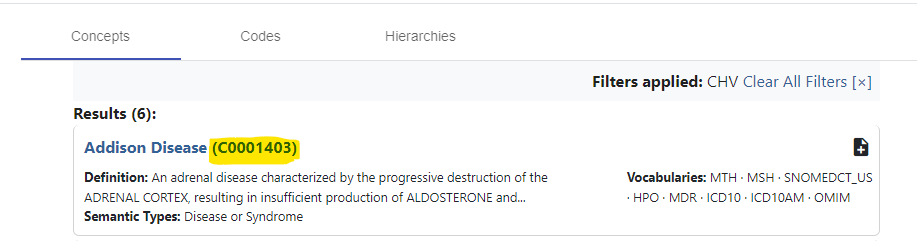

- **Question**: Run a search for the concept C0271737. What does it correspond to? After clicking on the search result, you can see the related concepts on the right of the screen ("Broader Concepts" and "Narrower Concepts"). Compare them with the Addison Disease concepts (Extract below). Comment.


CUID CO271737 corresponds to "Addison's disease due to autoimmunity". It belongs to the concept of "Addison's disease" in broader concept and it does not have narrow concept. Whereas Addison disease is kind of parent and all the mention term in narrow concept are their children or sublcasses.

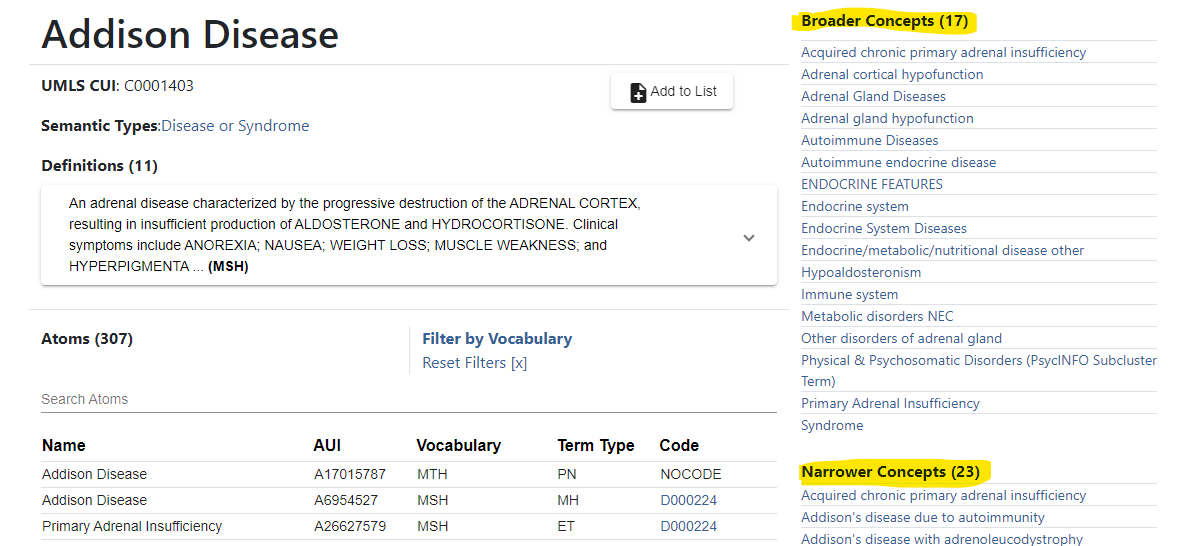

- **Question**: Using the Search window, describe how to constrain the concept display to the MSH (Medical Subject Headings) vocabulary, comment on the impact of this.

- **Question**: Run a new search for Covid, and filter the results by constraining them to the Semantic Group "Chemicals and Drugs". What do you observe? Comment.

From the left section of browser's filtering section, we can  choose `MSH` vocabulary to limit the terms and filter the terms which is available in MESH vocabulary.  

Upon search of COVID, and filter with chemicals and drug, we observe on result mentioning "Dendritic cells vaccine (C1511767)".

## MetaMap

The annotation tool MetaMap can be queried interactively [here](https://uts.nlm.nih.gov/uts/login?service=https:%2F%2Fii.nlm.nih.gov%2FInteractive%2FUTS_Required%2FMetaMap.html). For details of how it works, you can consult this [documentation file](https://ii.nlm.nih.gov/Publications/Papers/metamap06.pdf).


The input text we will be annotating can be found by downloading the following files; textfile1.txt, textfile2.txt, and textfile3.txt


### Annotation of a simple medical observation

We will use the dataframe created in the first part of the Lab to annotate some documents using MetaMap.


In [212]:
## access to the first document with .iloc

first_doc = covid_df.iloc[0]
doc_title = first_doc.Title
doc_abstract = first_doc.Abstract

'Title: ', doc_title, "Abstract: ", doc_abstract

('Title: ',
 'Humans are biocultural, science should be too.',
 'Abstract: ',
 'COVID-19 is restructuring societies. Loneliness is a global health threat. Large language models are outputting biased health care information, and human-artificial intelligence (AI) interfaces are reshaping how we live. For most humans, technology, biology, and society are hopelessly entangled. Are the sciences prepared to tackle the contemporary human experience?')

Annotate the first document copying its contents into the MetaMap search box.
- Example for the first document:

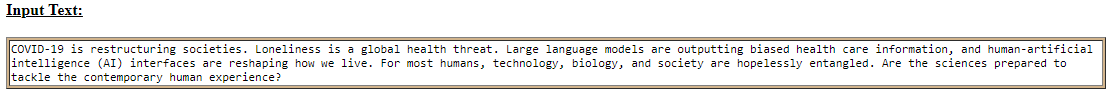

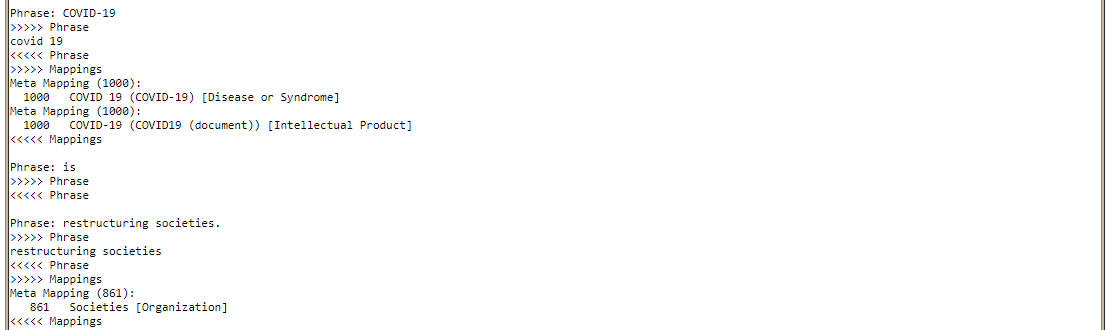

**MetaMap processes text in the following way: for every sentence, then every phrase, one or more concept sequences (Mappings) are suggested.**


- **Question**: Observe and analyse the results for the first document of the covid_df dataframe: taking into consideration what you saw of the UMLS Metathesaurus browser in the previous section, how do you think MetaMap works?

UMLS metaMap annotate the document with concepts available is Thesaurus. it use NER to idntify the concpet and link it with ids. Stop or common words are not taken into consideration of mapping and annotations.

### Annotation with *Semantic Types*

Access to the Output/Display Options of MetaMap to include "Short Semantic Types", and Formatted JSON output :

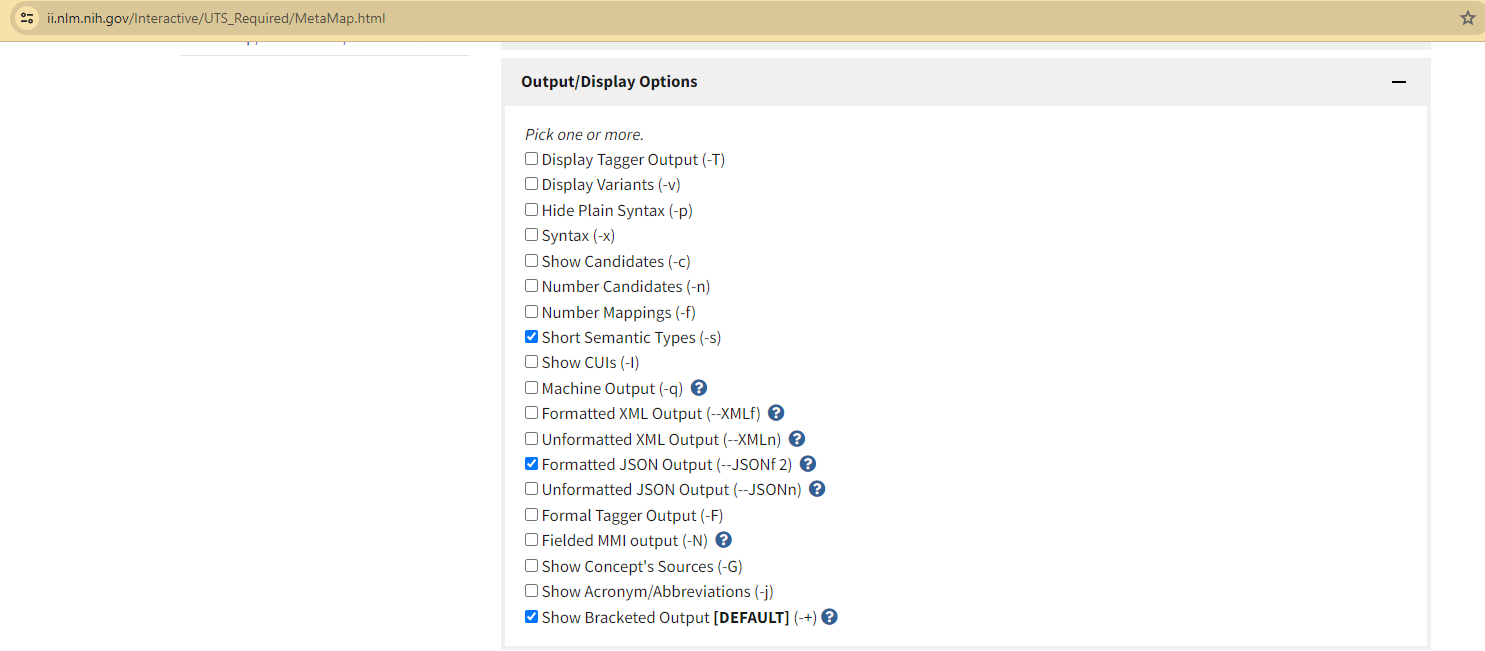


Annotate the second document of the dataframe.

- Select a sentence from the abstract and describe its annotation in detail.

In [216]:
### Get the second document of the dataframe:


-  **Question**: Observe the *semantic types* of the annotated concepts. Some of them tend to designate terms not directly related to medicine - which ones?


MetaMap can be configured to limit the annotation output to certain specified categories. This can allow us to limit the number of concepts in the output, for example preserving only the medical terms.

- To do this, go through the list of options below the input text box to find one that allows us to restrict the output to certain semantic types, or indeed to exclude them.
- From the point of view of an annotation aiming to index the medical concepts in the document, propose a list of semantic types to exclude in order to limit the vocabulary size without missing out on too many relevant terms. Justify your choices.

Analyse the output of one document and how the Medical concepts detected by the Annotation tool:

1. Select one Phrase to analyse.
> For example:
> We discovered a noncovalent, nonpeptidic inhibitor scaffold with lead-like properties that is differentiated from current main protease inhibitors for COVID-19

2. Create a variable for the json output
> For example:
> document_output




In [214]:
document_output = {
             "PhraseText": "a noncovalent, nonpeptidic inhibitor scaffold with lead-",
             "SyntaxUnits": [
               {
                 "SyntaxType": "det",
                 "LexMatch": "a",
                 "InputMatch": "a",
                 "LexCat": "det",
                 "Tokens": ["a"]
               },
               {
                 "SyntaxType": "mod",
                 "LexMatch": "noncovalent",
                 "InputMatch": "noncovalent",
                 "LexCat": "adj",
                 "Tokens": ["noncovalent"]
               },
               {
                 "SyntaxType": "punc",
                 "InputMatch": ",",
                 "Tokens": []
               },
               {
                 "SyntaxType": "mod",
                 "LexMatch": "nonpeptidic",
                 "InputMatch": "nonpeptidic",
                 "LexCat": "adj",
                 "Tokens": ["nonpeptidic"]
               },
               {
                 "SyntaxType": "mod",
                 "LexMatch": "inhibitor",
                 "InputMatch": "inhibitor",
                 "LexCat": "noun",
                 "Tokens": ["inhibitor"]
               },
               {
                 "SyntaxType": "head",
                 "LexMatch": "scaffold",
                 "InputMatch": "scaffold",
                 "LexCat": "noun",
                 "Tokens": ["scaffold"]
               },
               {
                 "SyntaxType": "prep",
                 "LexMatch": "with",
                 "InputMatch": "with",
                 "LexCat": "prep",
                 "Tokens": ["with"]
               },
               {
                 "SyntaxType": "mod",
                 "LexMatch": "lead",
                 "InputMatch": "lead",
                 "LexCat": "noun",
                 "Tokens": ["lead"]
               },
               {
                 "SyntaxType": "punc",
                 "InputMatch": "-",
                 "Tokens": []
               }],
             "PhraseStartPos": "14",
             "PhraseLength": "56",
             "Candidates": [],
             "Mappings": [
               {
                 "MappingScore": "-656",
                 "MappingCandidates": [
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1999216",
                     "CandidateMatched": "INHIBITOR",
                     "CandidatePreferred": "Inhibitor",
                     "MatchedWords": ["inhibitor"],
                     "SemTypes": ["bacs"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "4",
                         "TextMatchEnd": "4",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["NCI","NCI_CDISC"],
                     "ConceptPIs": [
                       {
                         "StartPos": "41",
                         "Length": "9"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-748",
                     "CandidateCUI": "C0337143",
                     "CandidateMatched": "Scaffold",
                     "CandidatePreferred": "Scaffold",
                     "MatchedWords": ["scaffold"],
                     "SemTypes": ["mnob"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "5",
                         "TextMatchEnd": "5",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "yes",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","SNMI","SNOMEDCT_US"],
                     "ConceptPIs": [
                       {
                         "StartPos": "51",
                         "Length": "8"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C0023175",
                     "CandidateMatched": "???lead",
                     "CandidatePreferred": "lead",
                     "MatchedWords": ["lead"],
                     "SemTypes": ["elii","hops"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "7",
                         "TextMatchEnd": "7",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["AOD","CHV","CSP","LCH","LCH_NW","LNC","MSH","MTH","MTHSPL","NCI","NCI_CTRP","NCI_FDA","NLMSubSyn","RXNORM","SNM","SNMI","SNOMEDCT_US"],
                     "ConceptPIs": [
                       {
                         "StartPos": "65",
                         "Length": "4"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   }]
               },
               {
                 "MappingScore": "-656",
                 "MappingCandidates": [
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1999216",
                     "CandidateMatched": "INHIBITOR",
                     "CandidatePreferred": "Inhibitor",
                     "MatchedWords": ["inhibitor"],
                     "SemTypes": ["bacs"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "4",
                         "TextMatchEnd": "4",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["NCI","NCI_CDISC"],
                     "ConceptPIs": [
                       {
                         "StartPos": "41",
                         "Length": "9"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-748",
                     "CandidateCUI": "C0337143",
                     "CandidateMatched": "Scaffold",
                     "CandidatePreferred": "Scaffold",
                     "MatchedWords": ["scaffold"],
                     "SemTypes": ["mnob"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "5",
                         "TextMatchEnd": "5",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "yes",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","SNMI","SNOMEDCT_US"],
                     "ConceptPIs": [
                       {
                         "StartPos": "51",
                         "Length": "8"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C0181586",
                     "CandidateMatched": "Lead",
                     "CandidatePreferred": "Leads (device)",
                     "MatchedWords": ["lead"],
                     "SemTypes": ["mnob"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "7",
                         "TextMatchEnd": "7",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","MTH","NCI"],
                     "ConceptPIs": [
                       {
                         "StartPos": "65",
                         "Length": "4"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   }]
               },
               {
                 "MappingScore": "-656",
                 "MappingCandidates": [
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1999216",
                     "CandidateMatched": "INHIBITOR",
                     "CandidatePreferred": "Inhibitor",
                     "MatchedWords": ["inhibitor"],
                     "SemTypes": ["bacs"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "4",
                         "TextMatchEnd": "4",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["NCI","NCI_CDISC"],
                     "ConceptPIs": [
                       {
                         "StartPos": "41",
                         "Length": "9"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-748",
                     "CandidateCUI": "C0337143",
                     "CandidateMatched": "Scaffold",
                     "CandidatePreferred": "Scaffold",
                     "MatchedWords": ["scaffold"],
                     "SemTypes": ["mnob"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "5",
                         "TextMatchEnd": "5",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "yes",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","SNMI","SNOMEDCT_US"],
                     "ConceptPIs": [
                       {
                         "StartPos": "51",
                         "Length": "8"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1442948",
                     "CandidateMatched": "lead",
                     "CandidatePreferred": "Plumbum metallicum, homeopathic preparation",
                     "MatchedWords": ["lead"],
                     "SemTypes": ["inch","phsu"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "7",
                         "TextMatchEnd": "7",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","MTH"],
                     "ConceptPIs": [
                       {
                         "StartPos": "65",
                         "Length": "4"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   }]
               },
               {
                 "MappingScore": "-656",
                 "MappingCandidates": [
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1999216",
                     "CandidateMatched": "INHIBITOR",
                     "CandidatePreferred": "Inhibitor",
                     "MatchedWords": ["inhibitor"],
                     "SemTypes": ["bacs"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "4",
                         "TextMatchEnd": "4",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["NCI","NCI_CDISC"],
                     "ConceptPIs": [
                       {
                         "StartPos": "41",
                         "Length": "9"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-748",
                     "CandidateCUI": "C0337143",
                     "CandidateMatched": "Scaffold",
                     "CandidatePreferred": "Scaffold",
                     "MatchedWords": ["scaffold"],
                     "SemTypes": ["mnob"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "5",
                         "TextMatchEnd": "5",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "yes",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","SNMI","SNOMEDCT_US"],
                     "ConceptPIs": [
                       {
                         "StartPos": "51",
                         "Length": "8"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1522538",
                     "CandidateMatched": "Lead",
                     "CandidatePreferred": "Leading",
                     "MatchedWords": ["lead"],
                     "SemTypes": ["ftcn"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "7",
                         "TextMatchEnd": "7",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["MTH","NCI"],
                     "ConceptPIs": [
                       {
                         "StartPos": "65",
                         "Length": "4"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   }]
               },
               {
                 "MappingScore": "-656",
                 "MappingCandidates": [
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1999216",
                     "CandidateMatched": "INHIBITOR",
                     "CandidatePreferred": "Inhibitor",
                     "MatchedWords": ["inhibitor"],
                     "SemTypes": ["bacs"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "4",
                         "TextMatchEnd": "4",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["NCI","NCI_CDISC"],
                     "ConceptPIs": [
                       {
                         "StartPos": "41",
                         "Length": "9"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-748",
                     "CandidateCUI": "C0337143",
                     "CandidateMatched": "Scaffold",
                     "CandidatePreferred": "Scaffold",
                     "MatchedWords": ["scaffold"],
                     "SemTypes": ["mnob"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "5",
                         "TextMatchEnd": "5",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "yes",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","SNMI","SNOMEDCT_US"],
                     "ConceptPIs": [
                       {
                         "StartPos": "51",
                         "Length": "8"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C2348269",
                     "CandidateMatched": "Lead",
                     "CandidatePreferred": "Dietary Lead",
                     "MatchedWords": ["lead"],
                     "SemTypes": ["elii"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "7",
                         "TextMatchEnd": "7",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["MTH","NCI","NCI_CRCH"],
                     "ConceptPIs": [
                       {
                         "StartPos": "65",
                         "Length": "4"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   }]
               },
               {
                 "MappingScore": "-656",
                 "MappingCandidates": [
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C1999216",
                     "CandidateMatched": "INHIBITOR",
                     "CandidatePreferred": "Inhibitor",
                     "MatchedWords": ["inhibitor"],
                     "SemTypes": ["bacs"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "4",
                         "TextMatchEnd": "4",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["NCI","NCI_CDISC"],
                     "ConceptPIs": [
                       {
                         "StartPos": "41",
                         "Length": "9"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-748",
                     "CandidateCUI": "C0337143",
                     "CandidateMatched": "Scaffold",
                     "CandidatePreferred": "Scaffold",
                     "MatchedWords": ["scaffold"],
                     "SemTypes": ["mnob"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "5",
                         "TextMatchEnd": "5",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "yes",
                     "IsOverMatch": "no",
                     "Sources": ["CHV","SNMI","SNOMEDCT_US"],
                     "ConceptPIs": [
                       {
                         "StartPos": "51",
                         "Length": "8"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   },
                   {
                     "CandidateScore": "-581",
                     "CandidateCUI": "C3275067",
                     "CandidateMatched": "LEAD",
                     "CandidatePreferred": "Cardiac Lead Procedure",
                     "MatchedWords": ["lead"],
                     "SemTypes": ["topp"],
                     "MatchMaps": [
                       {
                         "TextMatchStart": "7",
                         "TextMatchEnd": "7",
                         "ConcMatchStart": "1",
                         "ConcMatchEnd": "1",
                         "LexVariation": "0"
                       }],
                     "IsHead": "no",
                     "IsOverMatch": "no",
                     "Sources": ["MTH","NCI","NCI_CDISC","NLMSubSyn"],
                     "ConceptPIs": [
                       {
                         "StartPos": "65",
                         "Length": "4"
                       }],
                     "Status": "0",
                     "Negated": "0"
                   }]
               }]
           }

- You can use the annotated text to show the detected CUIs in the phrase:

To do so, you need to access to the "Mappings" of each annotated "PhraseText", and look the CandidateCUI and the detected CandidatePreferred.


In [215]:
print("Phrase: ")
print(document_output['PhraseText'])

print("Number of Mappings detected: ", len(document_output['Mappings']))
for (mapping) in document_output['Mappings']:
  print("Number of Candidates:", len(mapping['MappingCandidates']))
  for candidate in mapping['MappingCandidates']:
    print('candidateCUI: ', candidate['CandidateCUI'], end='; ')
    print('CandidatePreferred: ', candidate['CandidatePreferred'] )


Phrase: 
a noncovalent, nonpeptidic inhibitor scaffold with lead-
Number of Mappings detected:  6
Number of Candidates: 3
candidateCUI:  C1999216; CandidatePreferred:  Inhibitor
candidateCUI:  C0337143; CandidatePreferred:  Scaffold
candidateCUI:  C0023175; CandidatePreferred:  lead
Number of Candidates: 3
candidateCUI:  C1999216; CandidatePreferred:  Inhibitor
candidateCUI:  C0337143; CandidatePreferred:  Scaffold
candidateCUI:  C0181586; CandidatePreferred:  Leads (device)
Number of Candidates: 3
candidateCUI:  C1999216; CandidatePreferred:  Inhibitor
candidateCUI:  C0337143; CandidatePreferred:  Scaffold
candidateCUI:  C1442948; CandidatePreferred:  Plumbum metallicum, homeopathic preparation
Number of Candidates: 3
candidateCUI:  C1999216; CandidatePreferred:  Inhibitor
candidateCUI:  C0337143; CandidatePreferred:  Scaffold
candidateCUI:  C1522538; CandidatePreferred:  Leading
Number of Candidates: 3
candidateCUI:  C1999216; CandidatePreferred:  Inhibitor
candidateCUI:  C0337143; C

- **Question**: Now you can process another paragraph and list all the preferred terms and CUI contained in it. Pick only one candidate annotation per phrase.


### Annotation: Appraisal
**Question**: In your view, what is the utility of annotating documents such as these?

**Question**: Suggest some potential use cases for this kind of annotation.